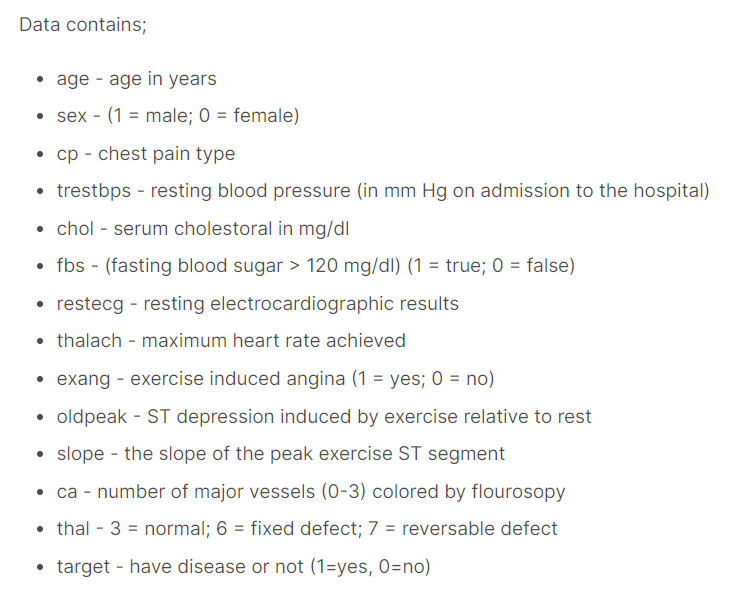

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df=pd.read_csv('heart.csv')
print(df.head())
print(df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)


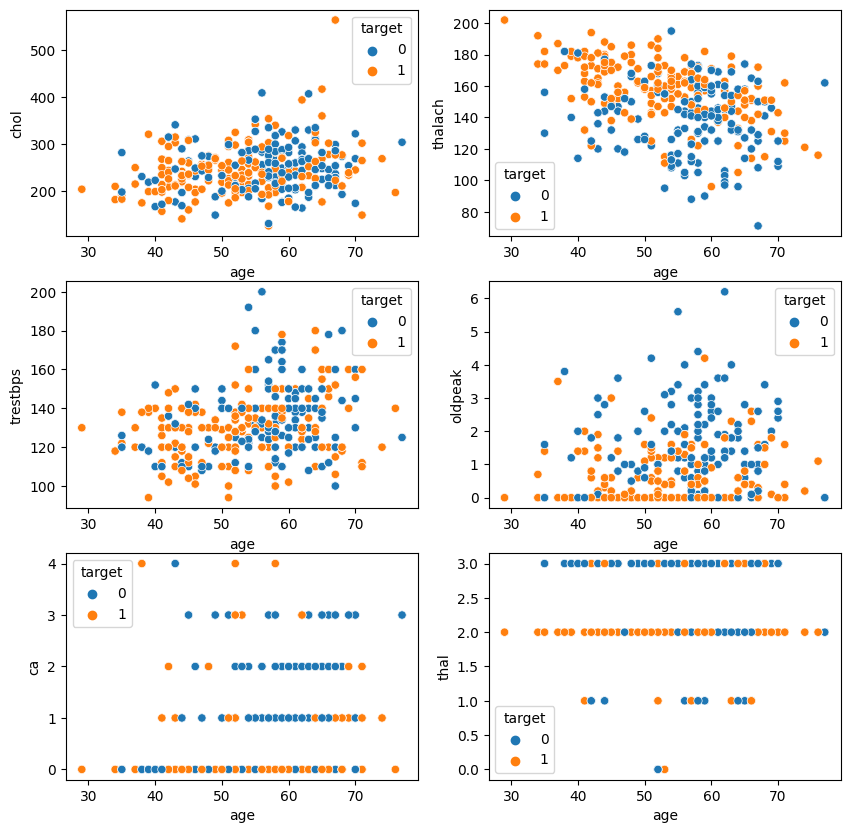

In [106]:
# Plot Scatter plot of each parameters vs target
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.scatterplot(x='age',y='chol',hue='target',data=df)
plt.subplot(3,2,2)
sns.scatterplot(x='age',y='thalach',hue='target',data=df)
plt.subplot(3,2,3)
sns.scatterplot(x='age',y='trestbps',hue='target',data=df)
plt.subplot(3,2,4)
sns.scatterplot(x='age',y='oldpeak',hue='target',data=df)
plt.subplot(3,2,5)
sns.scatterplot(x='age',y='ca',hue='target',data=df)
plt.subplot(3,2,6)
sns.scatterplot(x='age',y='thal',hue='target',data=df)
plt.show()

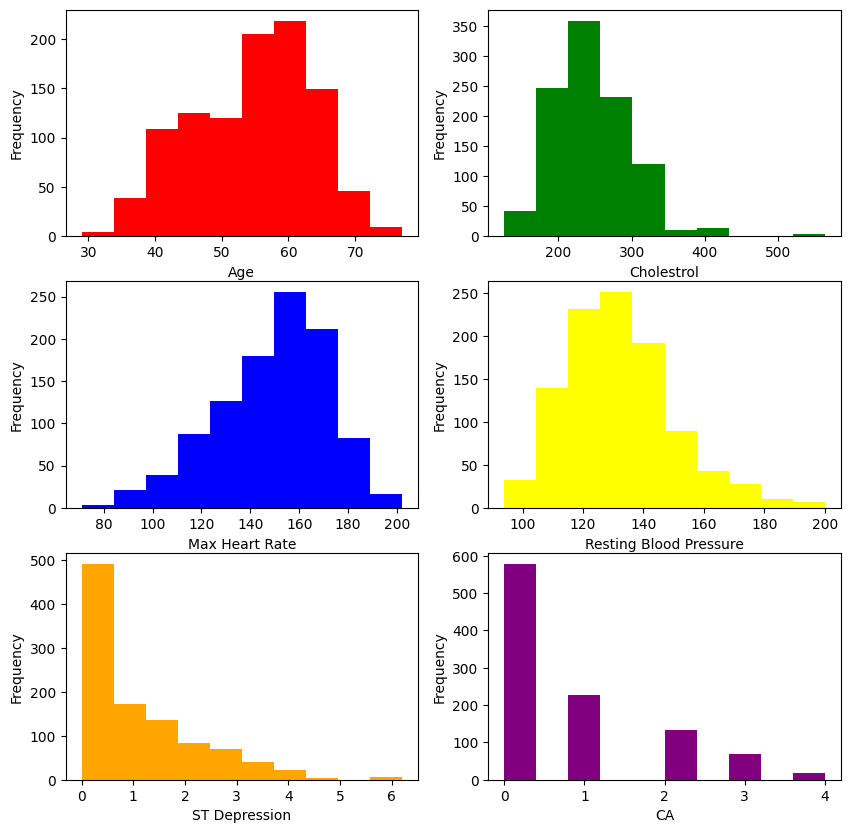

In [107]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.hist(df['age'],bins=10,color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(3,2,2)
plt.hist(df['chol'],bins=10,color='green')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.subplot(3,2,3)
plt.hist(df['thalach'],bins=10,color='blue')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.subplot(3,2,4)
plt.hist(df['trestbps'],bins=10,color='yellow')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.subplot(3,2,5)
plt.hist(df['oldpeak'],bins=10,color='orange')
plt.xlabel('ST Depression')
plt.ylabel('Frequency')
plt.subplot(3,2,6)
plt.hist(df['ca'],bins=10,color='purple')
plt.xlabel('CA')
plt.ylabel('Frequency')
plt.show()



Preprocessing Steps For Removing Outlier, Inconsistency and Redundency.

In [108]:

df=df[df['chol']<400]
df=df[df['trestbps']<=180]
df=df[df['thalach']>=65]
df=df[df['thalach']<=200]
df=df[df['oldpeak']<4]
df=df[df['age']<75]
df=df[df['age']>26]
df=df[df['trestbps']>90]
df=df[df['trestbps']<180]
df=df[df['chol']>=140]
df.shape
# Total Inconsitencies removed:  1025-958=67 

(958, 14)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
X=df.drop(['target'],axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       958 non-null    int64  
 1   sex       958 non-null    int64  
 2   cp        958 non-null    int64  
 3   trestbps  958 non-null    int64  
 4   chol      958 non-null    int64  
 5   fbs       958 non-null    int64  
 6   restecg   958 non-null    int64  
 7   thalach   958 non-null    int64  
 8   exang     958 non-null    int64  
 9   oldpeak   958 non-null    float64
 10  slope     958 non-null    int64  
 11  ca        958 non-null    int64  
 12  thal      958 non-null    int64  
 13  target    958 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 112.3 KB


In [111]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,54.112735,0.705637,0.960334,130.265136,243.290188,0.146138,0.527140,149.275574,0.324635,0.968372,1.407098,0.718163,2.305846,0.526096
std,8.915593,0.455994,1.031628,15.991398,44.679344,0.353429,0.507822,22.880665,0.468483,1.019103,0.598877,1.005681,0.617904,0.499579
min,34.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,74.000000,1.000000,3.000000,178.000000,394.000000,1.000000,2.000000,194.000000,1.000000,3.800000,2.000000,4.000000,3.000000,1.000000


In [112]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
m3=accuracy_score(y_test,y_pred)
cm3=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm3)

Accuracy Score:  0.9739583333333334
Confusion matrix:
 [[186   7]
 [  3 188]]


In [113]:


model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
m1=accuracy_score(y_test,y_pred)
# show integers in matrix
cm1=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm1)


Accuracy Score:  0.8359375
Confusion matrix:
 [[149  44]
 [ 19 172]]


c:\Users\darsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['age']=scaler.fit_transform(df[['age']])
df['trestbps']=scaler.fit_transform(df[['trestbps']])
df['chol']=scaler.fit_transform(df[['chol']])
df['thalach']=scaler.fit_transform(df[['thalach']])
df['oldpeak']=scaler.fit_transform(df[['oldpeak']])
df['ca']=scaler.fit_transform(df[['ca']])
df['thal']=scaler.fit_transform(df[['thal']])
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.237095,1,0,-0.329420,-0.700694,0,1,0.818779,0,0.031052,2,1.275262,1.123989,0
1,-0.124873,1,0,0.609074,-0.902234,1,0,0.250317,1,2.092764,0,-0.714479,1.123989,0
2,1.782895,1,0,0.921906,-1.551643,0,1,-1.061519,1,1.601881,0,-0.714479,1.123989,0
3,0.772900,1,0,1.109605,-0.902234,0,1,0.512684,0,-0.950716,2,0.280392,1.123989,0
4,0.885122,0,0,0.483942,1.135565,1,1,-1.892348,0,0.914643,1,2.270133,-0.495231,0


In [115]:
# Using SVM to predict target
from sklearn.svm import SVC
model2 = SVC(kernel ='rbf', C = 1 , gamma = 0.1)  
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
m2=accuracy_score(y_test,y_pred)
cm2=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm2)


Accuracy Score:  0.9166666666666666
Confusion matrix:
 [[161  32]
 [  0 191]]


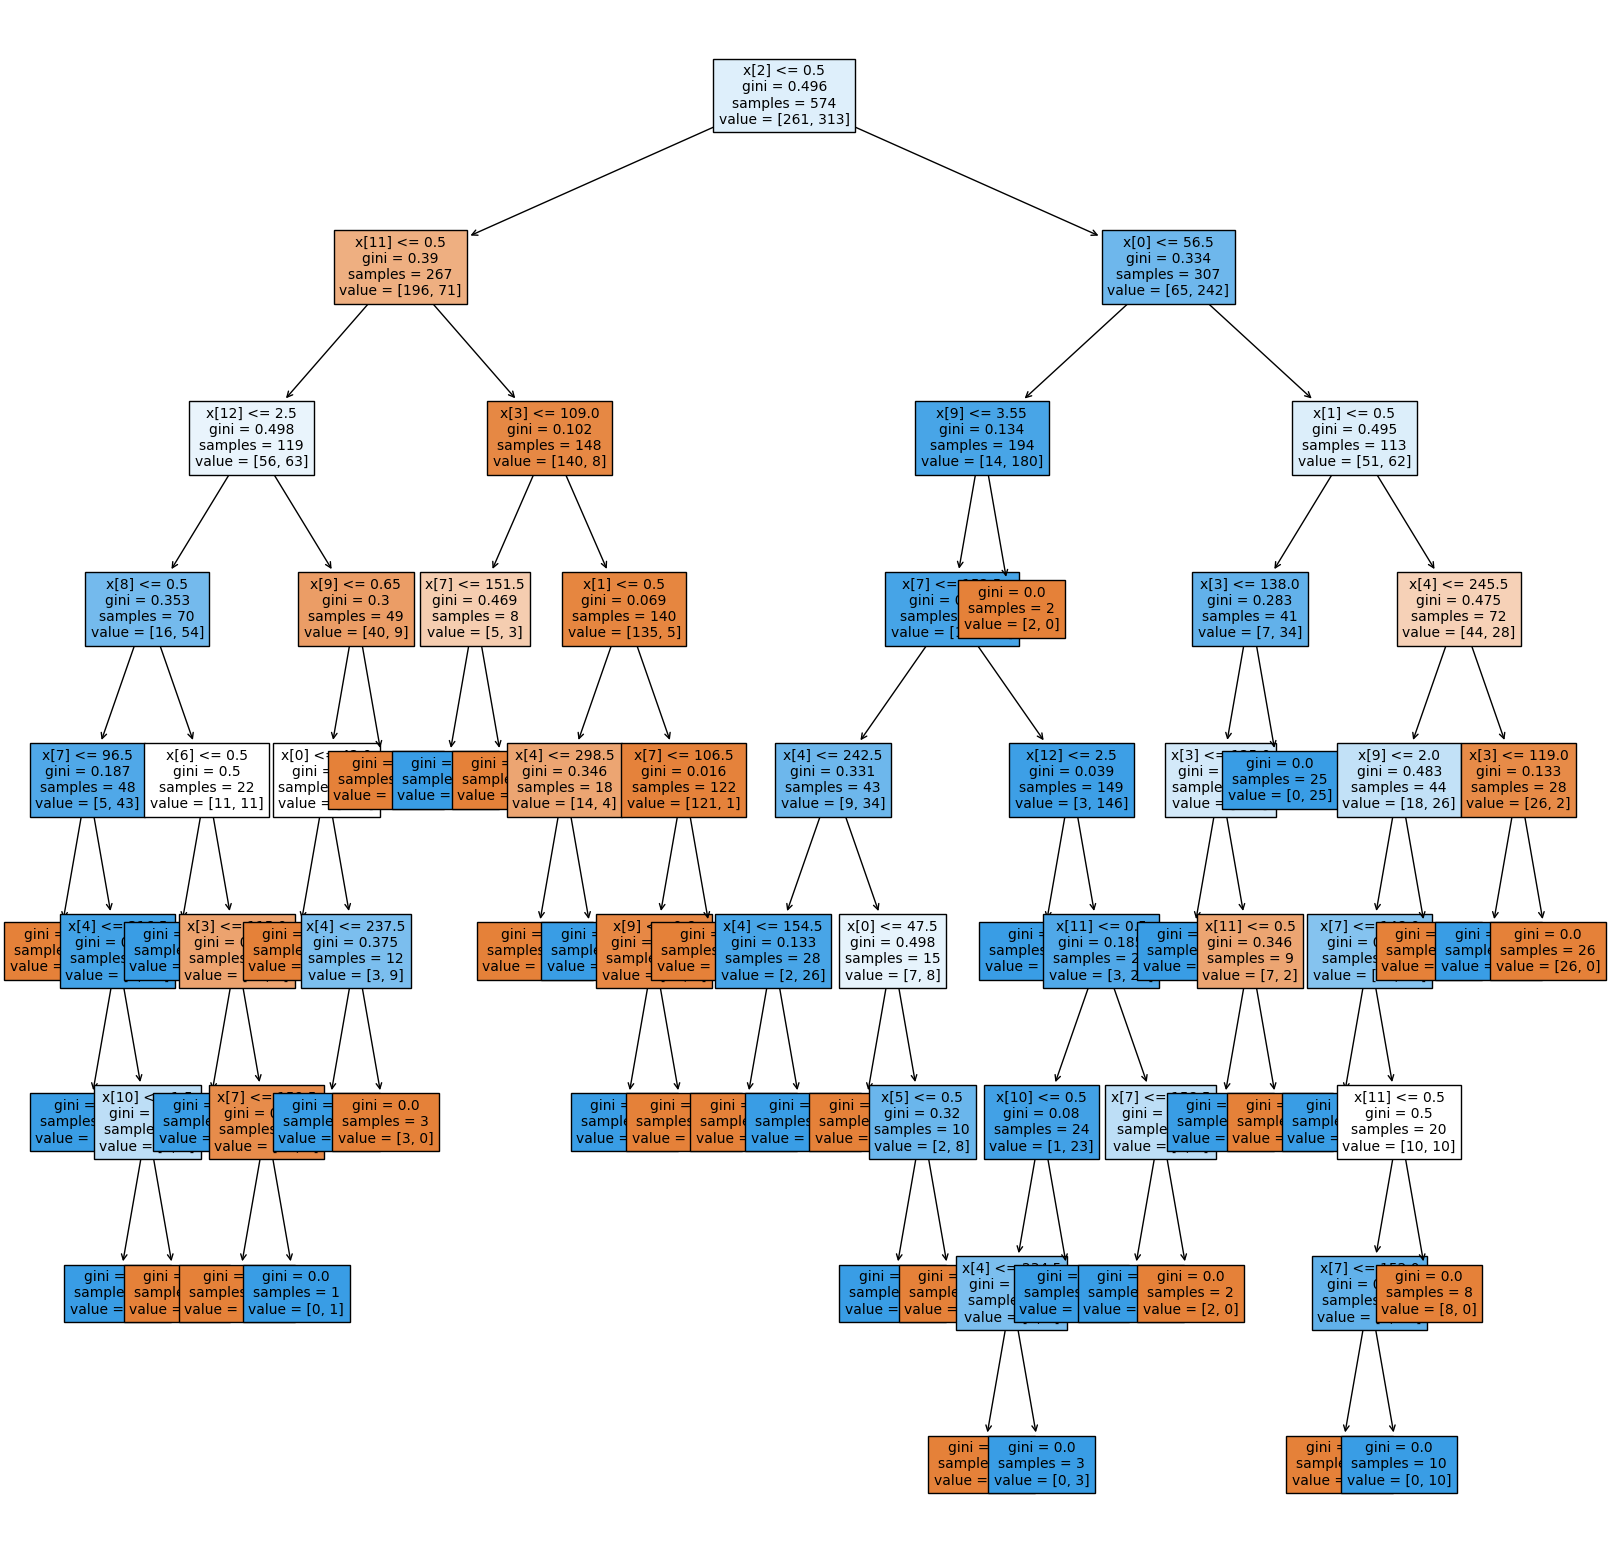

|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- thalach <= 96.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  96.50
|   |   |   |   |   |--- chol <= 316.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chol >  316.50
|   |   |   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- slope >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- exang >  0.50
|   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- restecg >  0.50
|   |   |   |   |   |--- trestbps <= 115.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- trestbps >  115.00
|   |   |   |   |   |   |--- thalach <= 159.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- thalach >  159.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- thal >  2.50
|   |   |   |--- oldpeak <= 0.65
|   |  

In [116]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
tree.plot_tree(model3, filled=True, fontsize=10)  # Adjust the fontsize as needed
plt.show()

# write decision tree in array format
from sklearn.tree import export_text
r = export_text(model3, feature_names=list(X.columns))
print(r)






In [117]:
# Using Naive Bayes to predict target
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
m4=accuracy_score(y_test,y_pred)
cm4=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm4)


Accuracy Score:  0.8046875
Confusion matrix:
 [[149  44]
 [ 31 160]]


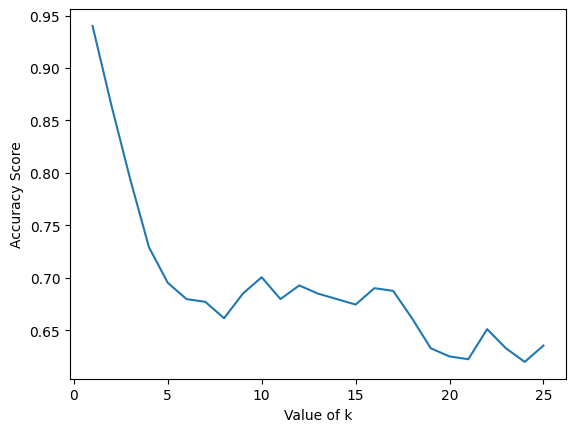

Accuracy Score:  0.6354166666666666


In [118]:
# Using KNN to predict target
from sklearn.neighbors import KNeighborsClassifier
model5=KNeighborsClassifier(n_neighbors=5)
# finding best value of k
k_range=range(1,26)
scores={}
scores_list=[]
for k in k_range:
    model5=KNeighborsClassifier(n_neighbors=k)
    model5.fit(X_train,y_train)
    y_pred=model5.predict(X_test)
    scores[k]=accuracy_score(y_test,y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))
plt.plot(k_range,scores_list)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.show()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
m5=accuracy_score(y_test,y_pred)
cm5=confusion_matrix(y_test,y_pred)


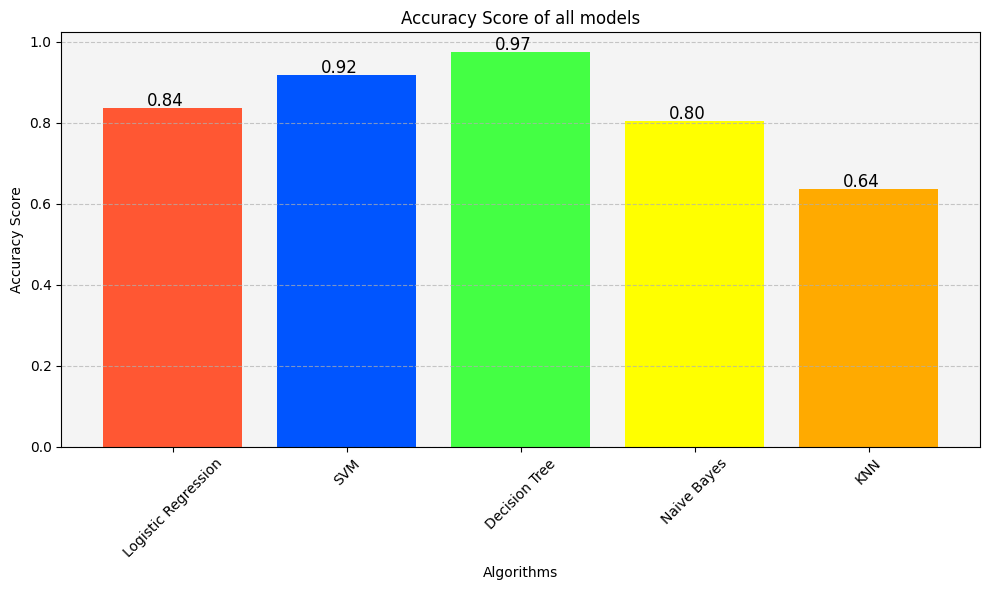

In [119]:
import matplotlib.pyplot as plt

accuracy_scores = [m1, m2, m3, m4, m5]
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'KNN']

colors = ['#FF5733', '#0055FF', '#44FF44', '#FFFF00', '#FFAA00']

plt.figure(figsize=(10, 6))

# Create the bar plot with custom colors
bars = plt.bar(models, accuracy_scores, color=colors)

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.005, f'{score:.2f}', fontsize=12)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of all models')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#F4F4F4')
plt.tight_layout()  
plt.show()


In [120]:
import pickle
pickle.dump(model,open('logistic.pkl','wb'))
# Code to load the model
# model=pickle.load(open('decision_tree.pkl','rb'))
# print(model.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]))


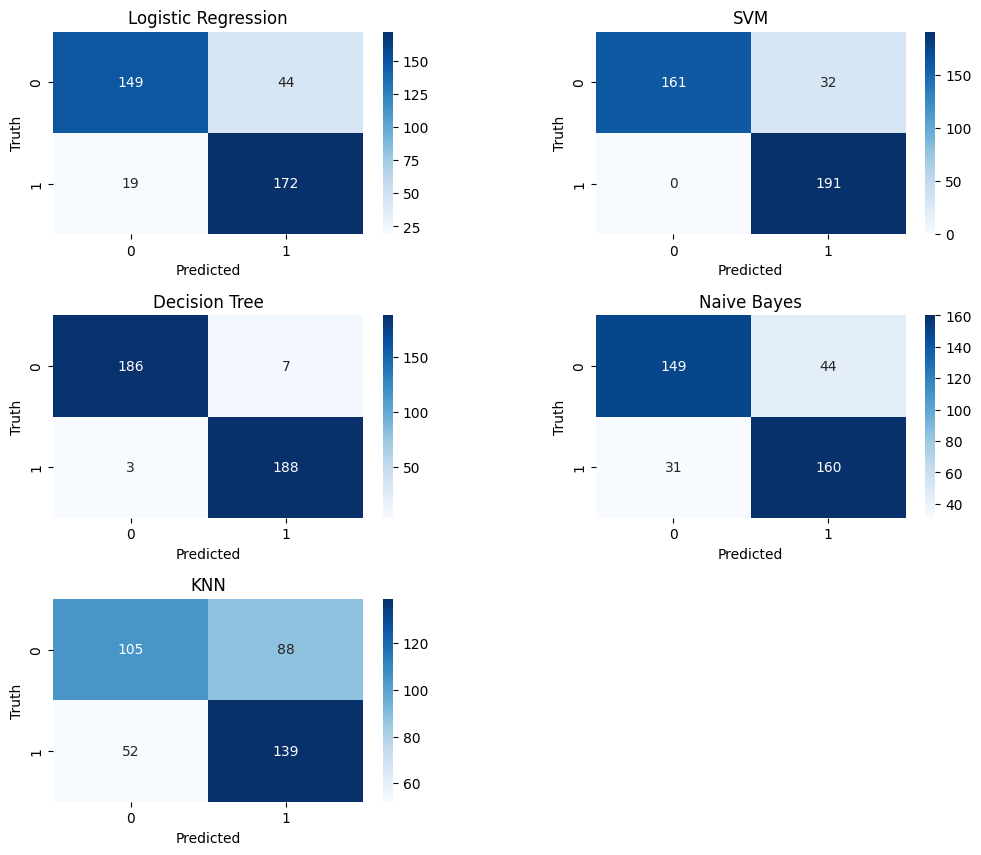

In [121]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Add spacing between subplots

plt.subplot(3, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression')

plt.subplot(3, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('SVM')

plt.subplot(3, 2, 3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree')

plt.subplot(3, 2, 4)
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Naive Bayes')

plt.subplot(3, 2, 5)
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('KNN')

plt.show()


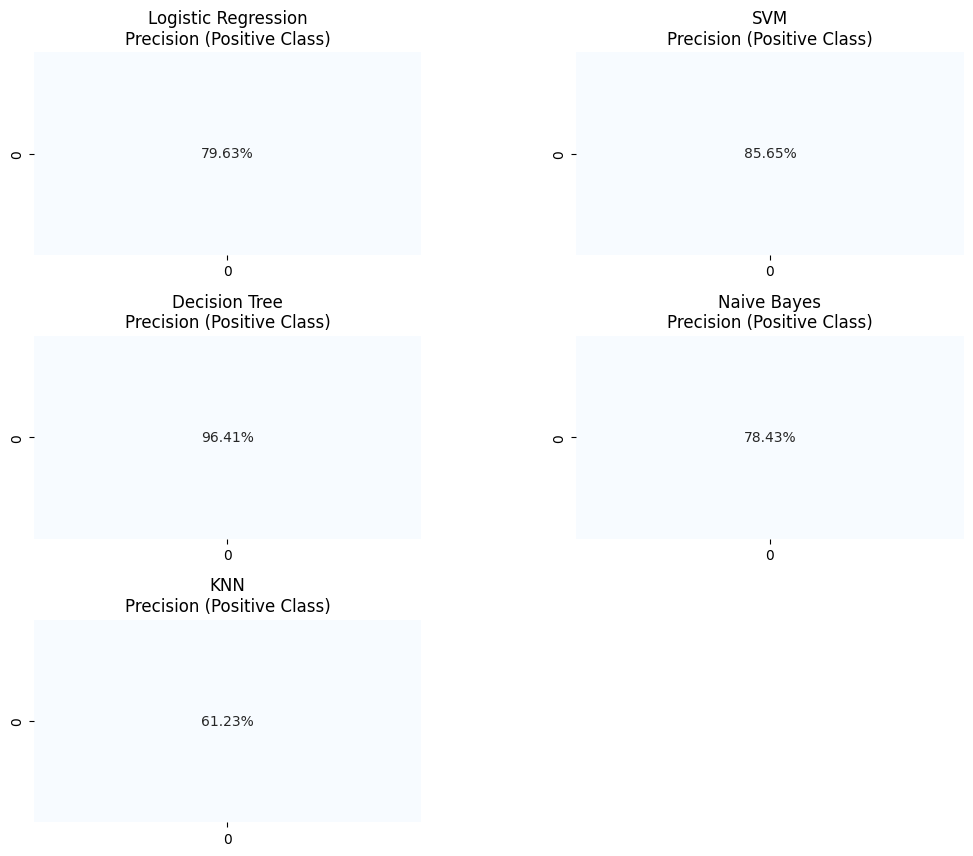

In [122]:


# Calculate precision for positive class
def calculate_precision(cm):
    true_positives = cm[1, 1]
    false_positives = cm[0, 1]
    precision = true_positives / (true_positives + false_positives)
    return precision

# Create a list of confusion matrices
confusion_matrices = [cm1, cm2, cm3, cm4, cm5]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'KNN']

# Create subplots
plt.figure(figsize=(12, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(5):
    plt.subplot(3, 2, i + 1)
    precision = calculate_precision(confusion_matrices[i])
    sns.heatmap(np.array([[precision]]), annot=True, fmt='.2%', cmap='Blues', cbar=False)
    plt.title(f'{model_names[i]}\nPrecision (Positive Class)')

plt.show()


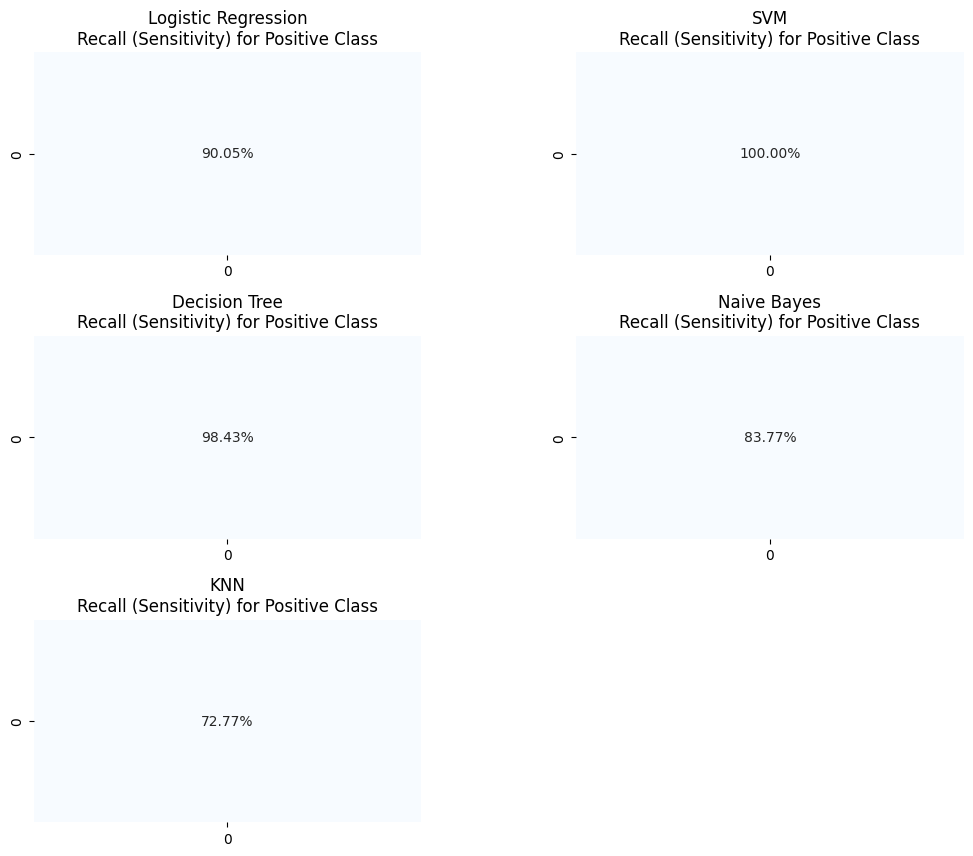

In [123]:


# Calculate recall (sensitivity) for the positive class
def calculate_recall(cm):
    true_positives = cm[1, 1]
    false_negatives = cm[1, 0]
    recall = true_positives / (true_positives + false_negatives)
    return recall

# Create a list of confusion matrices
confusion_matrices = [cm1, cm2, cm3, cm4, cm5]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'KNN']

# Create subplots
plt.figure(figsize=(12, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(5):
    plt.subplot(3, 2, i + 1)
    recall = calculate_recall(confusion_matrices[i])
    sns.heatmap(np.array([[recall]]), annot=True, fmt='.2%', cmap='Blues', cbar=False)
    plt.title(f'{model_names[i]}\nRecall (Sensitivity) for Positive Class')

plt.show()


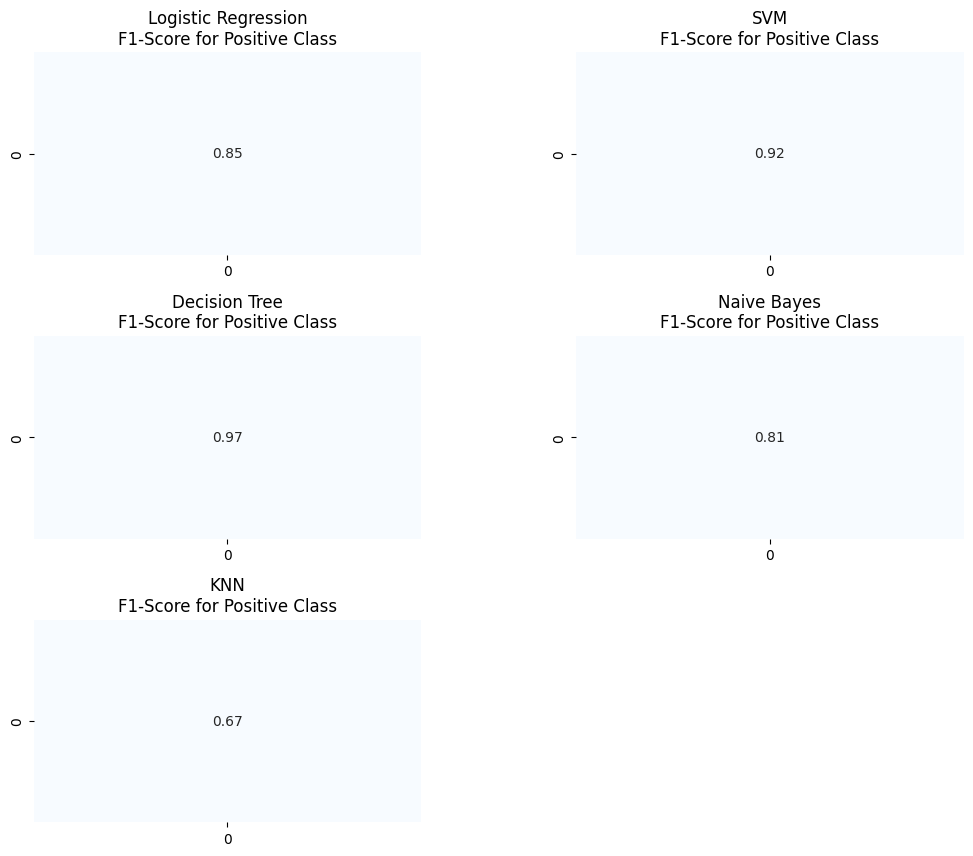

In [124]:
def calculate_f1_score(cm):
    true_positives = cm[1, 1]
    false_positives = cm[0, 1]
    false_negatives = cm[1, 0]
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

confusion_matrices = [cm1, cm2, cm3, cm4, cm5]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'KNN']

plt.figure(figsize=(12, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(5):
    plt.subplot(3, 2, i + 1)
    f1_score = calculate_f1_score(confusion_matrices[i])
    sns.heatmap(np.array([[f1_score]]), annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.title(f'{model_names[i]}\nF1-Score for Positive Class')

plt.show()
